In [948]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [949]:
weekly_est_cases_deaths = pd.read_csv("data/weekly_est_cases_deaths.csv")
weekly_est_cases_deaths['date'] = pd.to_datetime(weekly_est_cases_deaths['date'])

In [971]:
input_state = 'Delaware'

In [972]:
current_week_for_state = weekly_est_cases_deaths[(weekly_est_cases_deaths['state'] == input_state)].copy()
current_week_for_state = current_week_for_state[['date','est_inf','enc_w_inf','est_inf_per_100k']]

next_week_for_state = current_week_for_state[['date','est_inf','est_inf_per_100k']].shift().copy()
next_week_for_state.rename(columns={'date':'date_inf_occ_on','est_inf':'infect_1_week_later',
                                    'est_inf_per_100k':'est_inf_per_100k_week_ltr'}, inplace=True)

curr_and_next_for_state = current_week_for_state.join(next_week_for_state)
curr_and_next_for_state.dropna(inplace=True)

In [973]:
del curr_and_next_for_state['date_inf_occ_on']

## Correlation between subsequent weeks' infections

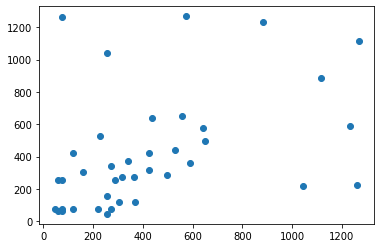

In [974]:
plt.scatter(curr_and_next_for_state['est_inf_per_100k'],curr_and_next_for_state['est_inf_per_100k_week_ltr'])

## Correlation between encounters and infections
encounters = mobility index * probability that a person is infectious

In [975]:
curr_and_next_for_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 297 to 335
Data columns (total 6 columns):
date                         39 non-null datetime64[ns]
est_inf                      39 non-null float64
enc_w_inf                    39 non-null float64
est_inf_per_100k             39 non-null float64
infect_1_week_later          39 non-null float64
est_inf_per_100k_week_ltr    39 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.1 KB


In [976]:
curr_and_next_for_state['time_delta'] = curr_and_next_for_state['date']-pd.to_datetime(curr_and_next_for_state.iloc[0,0])

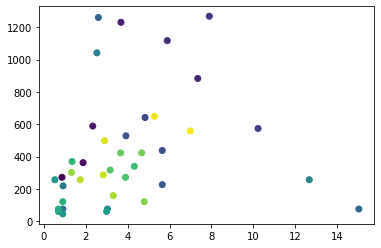

In [978]:
plt.scatter(curr_and_next_for_state['enc_w_inf'],curr_and_next_for_state['est_inf_per_100k'], c=curr_and_next_for_state['date'])

### Linear Regression

In [979]:
X = pd.DataFrame(curr_and_next_for_state['enc_w_inf'])
y = curr_and_next_for_state['est_inf_per_100k']

In [980]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
hyp = regr.predict(X)

Coefficients: 
 [21.73059866]
Mean squared error: 116630.38
Coefficient of determination: 0.04


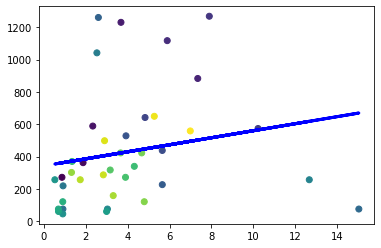

In [981]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, hyp))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, hyp))

X_for_plot = curr_and_next_for_state[['enc_w_inf','time_delta']]

# Plot outputs
plt.scatter(X_for_plot['enc_w_inf'], y,  c=X_for_plot['time_delta'])
plt.plot(X, hyp, color='blue', linewidth=3)

plt.show()

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_[0])

mean_squared_error(y, hyp)

In [982]:
exposure_model = pd.read_csv("data/exposure_model.csv")

In [983]:
exposure_model.sort_values(by=['coeff_determ'])

,State,coeff,coeff_determ,intercept,mse
7,Delaware,21.730599,0.040099,342.757704,116630.381148
46,Virginia,26.197098,0.086809,194.354614,11285.082480
1,Alaska,61.018887,0.136320,73.453420,20059.897223
39,Rhode Island,63.314955,0.296741,266.266063,240331.617629
17,Kentucky,51.641491,0.327197,147.816016,13021.463835
47,Washington,75.158265,0.350687,71.075574,4125.288806
29,New Hampshire,72.918391,0.365755,100.287203,23924.413814
36,Oklahoma,63.667617,0.374071,113.711833,26923.793856
10,Georgia,56.617824,0.424116,194.816948,22871.255727
37,Oregon,70.369328,0.430141,72.213992,8934.308388


In [984]:
weekly_inf_encounters = pd.read_csv('data/weekly_inf_encounters.csv')
weekly_inf_encounters

EmptyDataError: No columns to parse from file